# Exam fo signal processing (Khaliq Aghakarimov)

## Settings Khaliq Aghakarimov

### Instruction Khaliq Aghakarimov

* Make a copy of this document. 

* **First of all:**  Replace every `(NAMES)` by your first and second names. So this is:
    * at the begin of the document title
    * at the end of  each section titles  
This is your signature. From 10 min after the beginning and until the end, we will randomly check that the signatures are present.   


* **For colab user:** Share your copy with the 3 teachers:
    * konul.aliyeva@ufaz.az
    * contact.cellier.loic@gmail.com 
    * vincent.vigon@gmail.com
    * rabih.amhaz9@gmail.com
Use the button for this in your colab document. This will automatically send us an email. At the end of the exam, save and close the notebook and never open it later on (you would change the date and this will be considered as cheated).


* **For non-colab user:**  put the notebook in your computer (in a safe place). At the end, send us an email with your notebook itself and also a pdf version of it.  

* In both case: just one email per students. 

* Save your notebook every few minutes (control+S).  


* Reply directly on this document. Put your answers just after the question (before the long line).  Each time you reply, add this symbol $\spadesuit$  just after the symbol $\heartsuit$. 

Example: 

* $(1\heartsuit\spadesuit)$ What is the value of $\sin(\pi)$?

 $\sin(\pi)=0$

---

* $(1\heartsuit\spadesuit)$ What is the value of $\cos(\pi)$?

 $\cos(\pi)=-1$

---

With such answers, you win 2 points. 

### Aditionnal points: 

* Some additional points are given if all requirements are OK (signatures and $\spadesuit$).
* Some additional point are given if the formulas are well writed in latex.







### Strong advice Khaliq Aghakarimov


* You can look at your own notebook, if they are signed. 
* No web search. 
* No email (except just before living the room for the non-colab user).
* No messenger and so on
* No smart phone.  
* During all the exam, you have only notebooks open. 
* No communication with other student. Your eyes must  stick on your screen. 


If by misfortune you have a bad mark to its exam,  it is not a great deal. You probably compensate with others marks.  **But if you try to cheat, this will compromise the whole process of your studies (in all universities).** 



## Fourier Series (NAMES) Khaliq Aghakarimov

In this part, the time interval is $[0,T]$ with $T=4$. 


* $(2\heartsuit \spadesuit)$ Implement and plot the 11 first elements of the sin-cos basis (5 sinus, 5 cosinus, 1 constant function). 

---


* $(2\heartsuit \spadesuit)$ Check their orthogonality according to the appropropriate dot-product. 

---


* $(2\heartsuit \spadesuit)$ Compute the  approximation of the function $f(t)=\frac 1 5 ( t  -2)^4$ using these 11 elements. Plot on a same graphic the function and its approximation. 

---


* $(2\heartsuit \spadesuit)$  Compute the  approximation of the function $f(t)= t $ using these 11 elements. Plot on a same graphic the function and its approximation. 

---


* $(1\heartsuit \spadesuit)$  Compare the previous approximation (no code, just comments).
In these previous approximations one can see that, we approximated our given function quite well. The 1st one was better than the 2nd. We could use more coefficients in order to approximate better.

---


In [0]:
import numpy as np
import matplotlib.pyplot as plt

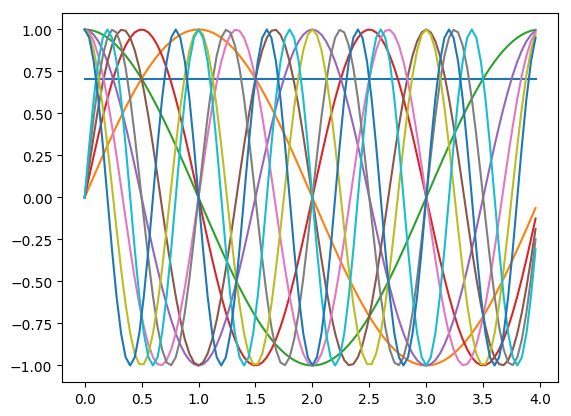

In [92]:
def dot(f,g):
    return 2*np.sum(f*g)/len(f)

def compute_sinCos_basis(t,T,M):
    """
    Args:
         t (1d-array) : time discretized
         T (int) : Duration 
         M (int) : number of different frequencies, so the size of the basis is 2N+1
    """

    basis_sc=np.empty([2*M+1,len(t)])
    basis_sc[0]=np.ones_like(t)/np.sqrt(2)
    for i in range(1,M+1):    
        basis_sc[2*i-1,:]=np.sin(i*2*np.pi*t/T)
        basis_sc[2*i,:]=np.cos(i*2*np.pi*t/T)
        
    return basis_sc

T=4
t=np.linspace(0,T,100,endpoint=False)

basis_sc=compute_sinCos_basis(t,T,10)

for i in range(11):
  plt.plot(t,basis_sc[i,:]);

In [93]:
"""compute some dot-product to check the orthonormality"""
nb=10
many_dot_products=np.empty([nb,nb])

for i in range(nb):
    for j in range(nb):
        many_dot_products[i,j]=dot(basis_sc[i,:],basis_sc[j,:])
print(many_dot_products)

#print(basis_sc[:10,:]@basis_sc[:,:10])
#print(basis_sc@basis_sc.T)


[[ 1. -0. -0.  0. -0.  0. -0. -0. -0. -0.]
 [-0.  1.  0. -0.  0. -0.  0. -0. -0. -0.]
 [-0.  0.  1.  0.  0.  0.  0. -0.  0.  0.]
 [ 0. -0.  0.  1. -0. -0. -0. -0.  0. -0.]
 [-0.  0.  0. -0.  1. -0.  0.  0. -0. -0.]
 [ 0. -0.  0. -0. -0.  1.  0. -0. -0.  0.]
 [-0.  0.  0. -0.  0.  0.  1. -0.  0. -0.]
 [-0. -0. -0. -0.  0. -0. -0.  1. -0.  0.]
 [-0. -0.  0.  0. -0. -0.  0. -0.  1.  0.]
 [-0. -0.  0. -0. -0.  0. -0.  0.  0.  1.]]


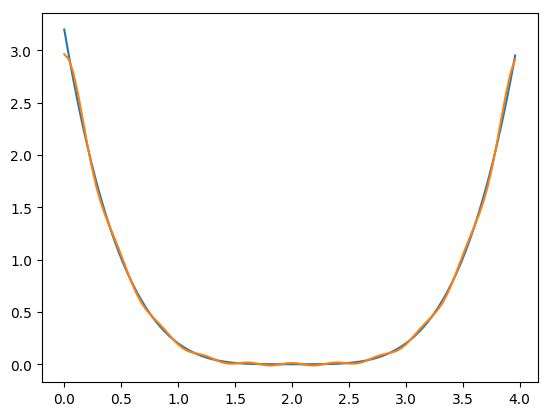

In [105]:
nb_points=100
T=4
t=np.linspace(0,T,nb_points,endpoint=False)

f=1/5*(t-2)**4
coordinates=np.empty(len(basis_sc))
for i in range(len(basis_sc)):
  coordinates[i]=dot(f,basis_sc[i,:])
approximation=coordinates@basis_sc

plt.plot(t,f)
plt.plot(t,approximation)

21


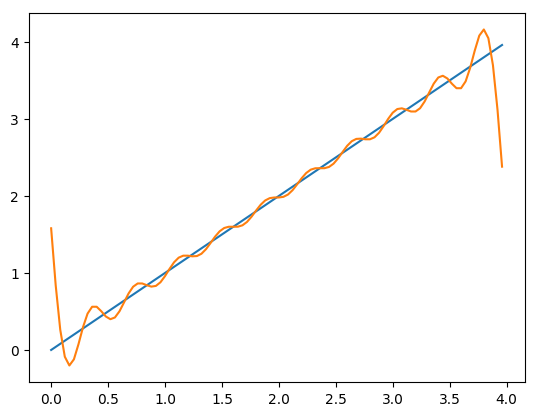

In [103]:
nb_points=100
T=4
t=np.linspace(0,T,nb_points,endpoint=False)

f=t
coordinates=np.empty(len(basis_sc))
for i in range(len(basis_sc)):
  coordinates[i]=dot(f,basis_sc[i,:])
approximation=coordinates@basis_sc

plt.plot(t,f)
plt.plot(t,approximation)

## Discrete Fourier Transform (NAMES) Khaliq Aghakarimov

We consider the following signal 

$$
t \mapsto  0.1 \sin(300 \pi t) +  \sin(4\pi t)+ 0.5 \sin(6\pi t)+0.2\sin(10\pi t)
$$
On the time interval $[0,3]$


* $(1\heartsuit \spadesuit) \$ What is the frequency of this signal. 
  The frequency for each of them separately would be 1/150s, 1/2s, 1/3s, 1/5s. And for the total function T=1s. Then frequency=1Hz.
---

* $(1\heartsuit \spadesuit)$ Which term can be considerate as a noise ? Give example of noise in a true physical signal.
 Noise would be the first term 0.1sin(300*$\pi$*t) since its period (frequency) strictly differs from the others.
---

* $(2\heartsuit \spadesuit)$  Compute and plot a sampling of this signal, with a sampling rate of 1000 Hz.  Call this sampling `sampling_good`

---


* $(2\heartsuit \spadesuit)$ Compute and plot a sampling of this signal, with a sampling rate of 100 Hz.  Call this sampling `sampling_bad`

---



* $(2\heartsuit \spadesuit)$  Compute the  half amplitude spectrum of the two signal, with the  x-ticks that represent the frequencies. 


---


* $(2\heartsuit)$  Explain the correspondance between the picks of these two spectrums and the different term which appears in the signal. 



---



In [0]:
def signal(t):
    return 0.1*np.sin(300*np.pi*t)+np.sin(4*np.pi*t)+0.5*np.sin(6*np.pi*t)+0.2*np.sin(10*np.pi*t)

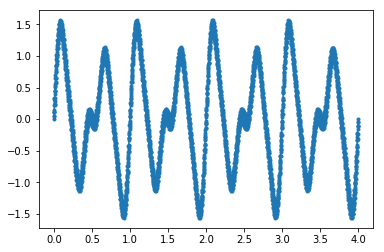

In [52]:
sampling_rate = 1000

#fig,ax=plt.subplots(nb,1,figsize=(8,nb),sharex=True)
t=np.linspace(0,T,sampling_rate*T)
sampling_good=signal(t)
plt.plot(t,sampling_good, ".-")


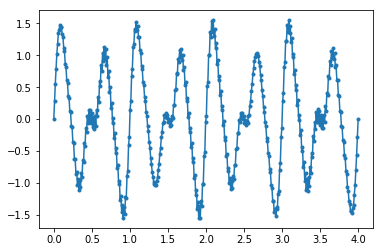

In [53]:
sampling_rate = 100

#fig,ax=plt.subplots(nb,1,figsize=(8,nb),sharex=True)
t=np.linspace(0,T,sampling_rate*T)
sampling_bad=singal(t)
plt.plot(t,sampling_bad, ".-")

#fig.tight_layout()

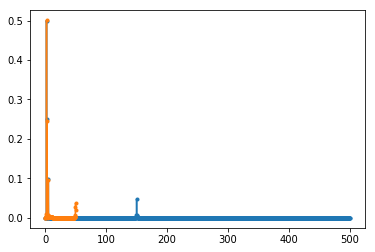

In [59]:
t1=np.linspace(0,T,1000*T)
sampling_good=signal(t1)
spectrum1=np.abs(np.fft.rfft(sampling_good))/len(t1)
freqs1=np.linspace(0,len(t1)/(2*T),len(spectrum1))

t2=np.linspace(0,T,100*T)
sampling_bad=signal(t2)
spectrum2=np.abs(np.fft.rfft(signal(t2)))/len(t2)
freqs2=np.linspace(0,len(t2)/(2*T),len(spectrum2))

plt.plot(freqs1,spectrum1,".-")
plt.plot(freqs2,spectrum2,".-")

## images (NAMES) Khaliq Aghakarimov

In [60]:
"we import (=clone) all the data or just update (=pull) them"

import os

if not os.path.exists("assets_signal"):
    print("the directory assets_signal is created")
    !git clone https://github.com/vincentvigon/assets_signal
else:
    print("the directory assets_signal is updated")
    %cd assets_signal
    !git pull https://github.com/vincentvigon/assets_signal
    %cd ..

the directory assets_signal is created
Cloning into 'assets_signal'...
remote: Enumerating objects: 227, done.
remote: Counting objects: 100% (227/227), done.
remote: Compressing objects: 100% (182/182), done.
remote: Total 227 (delta 80), reused 188 (delta 41), pack-reused 0
Receiving objects: 100% (227/227), 13.15 MiB | 39.83 MiB/s, done.
Resolving deltas: 100% (80/80), done.


In [0]:
%reset -f

In [0]:
import numpy as np
import scipy.signal
import  matplotlib.pyplot as plt
import numpy
plt.style.use("default")

np.set_printoptions(linewidth=500,suppress=True,precision=2)

In [0]:
baboon = plt.imread("assets_signal/babouin/babouin_moyen.jpg")[:,:,0]


* $(2\heartsuit \spadesuit)$ Compute the shape, the range and the `dtype` of this image

--- 

* $(1\heartsuit \spadesuit)$ Plot this image

---

* $(2\heartsuit \spadesuit)$ Make a rotation of the image of 180 degrees

---

* $(2\heartsuit \spadesuit)$ Make a horizonta bluring of this image

In [64]:
baboon.shape,np.max(baboon)-np.min(baboon),baboon.dtype

((328, 273), 255, dtype('uint8'))

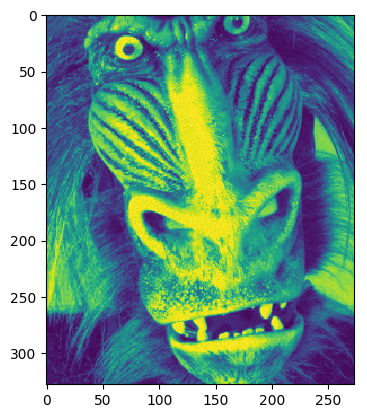

In [66]:
plt.imshow(baboon);

In [0]:
plt.imshow(baboon.T)

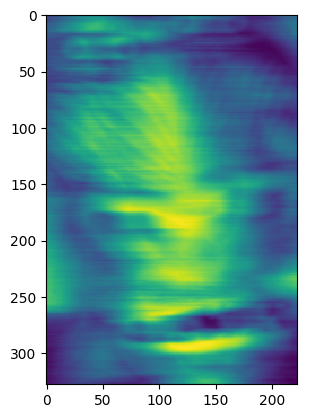

In [74]:
size=51
mask=np.ones([1,size])/size
#print(mask)

img_blur=scipy.signal.convolve(baboon,mask,mode="valid")
plt.imshow(img_blur)

## Denoising (NAMES) Khaliq Aghakarimov

Here is a fonction 


* $(1\heartsuit \spadesuit)$  In the next function  what is the meaning of the argument `shape`?
Argument 'shape' defines the size of my mask, by default it's 7x7.
---


* $(2 \heartsuit \spadesuit)$  In the next function  what  is the meaning of the argument `sigma`?
Argument 'sigma' defines the precision of our mask for denoising.


In [0]:
def gaussian_mask(shape=(7, 7), sigma=0.5):

    if len(shape)!=2: raise ValueError("len-2 shape required")
    if shape[0]%2!=1 or shape[1]%2!=1: raise ValueError("only odd sizes are OK")

    m,n = (shape[0]-1)/2,(shape[1]-1)/2
    y,x = np.ogrid[-m:m+1,-n:n+1]
    res = np.exp( -(x*x + y*y) / (2.*sigma*sigma) )

    
    """normalization"""
    res/=res.sum()
    return res

We add a gaussian noise to the image:


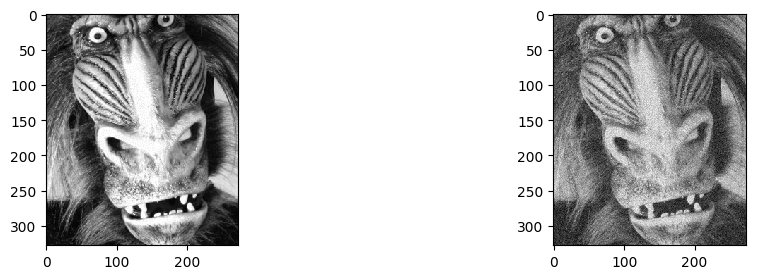

In [76]:

"""random noise (with gaussian distribution)"""
img=baboon+np.random.normal(scale=20.,size=baboon.shape)

fig,(ax0,ax1)=plt.subplots(1,2,figsize=(12,3))
ax0.imshow(baboon, cmap='gray')
ax1.imshow(img,cmap='gray');



* $(2\heartsuit \spadesuit)$  Denoise the image with using a gaussian mask. Use 3 very differents parameter `sigma`, compare the images with a `subplots`. 


---

* $(2\heartsuit)$  Compute the distances between the original image and the 3 denoised image. 

---

* $(4\heartsuit)$  Using a loop, try a lot of parameter `sigma` and extract the best one. 



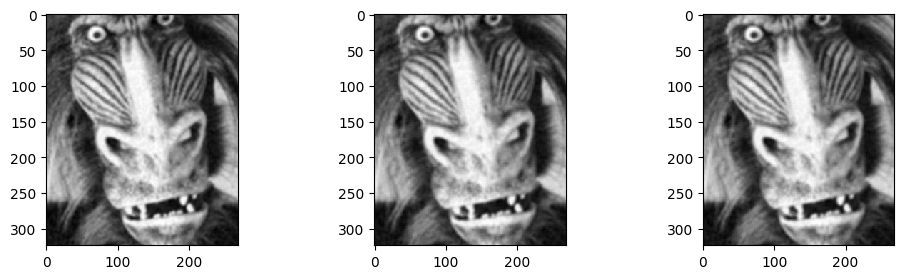

In [83]:
mask1 = gaussian_mask(shape=(5,5),sigma=2.)
mask2 = gaussian_mask(shape=(5,5),sigma=100)
mask3 = gaussian_mask(shape=(5,5),sigma=10000)

image_denoise1=scipy.signal.convolve(img,mask1, "valid")
image_denoise2=scipy.signal.convolve(img,mask2, "valid")
image_denoise3=scipy.signal.convolve(img,mask3, "valid")

fig,(ax0,ax1,ax2)=plt.subplots(1,3,figsize=(12,3))
ax0.imshow(image_denoise1, cmap='gray')
ax1.imshow(image_denoise2, cmap='gray')
ax2.imshow(image_denoise3, cmap='gray');